# Playgroung Mining : Understanding NBA Teams's Identity

Sports analytics is booming in Sport Professional World, whether it is in team, individual sports, on the amenities, on media, commercial strategy, ...

Team Sports are really hard to analyse, specially Basketball because the game is fast, in which all five players are almost always a factor of each plays (with or without the ball) and we can notice and note every contribution of all players in a game. But the NBA is finding some systems with special cameras and Artificial Intelligence to store more and more statistics on plays and on players.

Data analysing 'Play Type' is existing only for a few years (since Season 2015-2016), but are really interesting to understand teams, their strategy and analysing The Games. It's really a shame that there is not such Statistics and Data on European Basketball, I would be interested in understanding and analysing European Games. We know that there is a huge difference between NBA and European Basketball, but how to differentiate and identify those Two Types, Are there European Championship Indentyties also ? ... Few questions that I hope, I could answer in a few times.
It could also be interesting to see the Game Style evolution in the NBA, because NBA have also changed a lot between 80's, 90's, ... and now. Could we with Data and a few of Machine Learning make a clear border between each period.


If you don't know NBA or just have never seen an NBA Game, NBA is known especially for its Speed (plays in transition, fast break), 3 Points Shooting and Pick and Roll plays. But of course, there are different Team Styles between each Team and some of those styles are even the identity of some Teams (example with San Antonio known for its European Style with a rapid movement of the ball). In this article I explain how I used data from NBA.COM to classify Teams by Identity and specially find Teams that have a 'Historical Game Identity' since the season 2015-2016, what are those Game Style (or Identity) and it is always the best strategy for some Teams.

## Classification and building of the Model

### Imports

The aim of this analysis is to make groups of Teams that have approximatly the same Game Style, one group in call a 'Cluster'. To create those Clusters I had to use unsupervised algorithms, I decided to use KMeans method and I import those Libraries for the Classification Part.

In [1]:
#Files Library
import os

#Datavisualization Library
import matplotlib.pyplot as plt

#Maths and Matrix Libraries
import numpy as np 
import pandas as pd

#Machine Learning - Unsupervised Model Libraries
from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist 

### Loading Data 

In this first part of my analysis I used Data from nba.com, in Teams - Play Type. To create my clusters I based on Season 2015-2016 to the Season 2018-2019, and I used the Frequency of play types. Play Type focused on 11 types (Transition, Isolation, P&R_BH, P&R_RM, Post up, Spot up, Handoff, Cut, Off Screen, Putbacks, Misc). Before seeing the model prediction and the classification model I knew that all NBA Teams would have high percentage in Transition, Pick & Roll Ball Handler and Spot Up because it's the NBA current Style. At this time I was curious to see wich Teams could have special Type Play, I thought about Houston Rockets wich use a lot Isolation with James Harden, or Golden States with their 3 snipers Stephen Curry, Klay Thomson and Kevin Durant. I was also a bit disappointed to not have the Seasons from 2012 to 2015 and see the Style of the San Antonio Spurs with its Big Three Tim Duncan, Manu Ginobili and Tony Parker, Team that has for me the closest style to European Style. 

In [2]:
#Open the folder where is the file
os.chdir("C:/Users/julie/Documents/Projets_Perso/Sport_Analytics/Basket/NBA/Databases")

# Read data from file 'Teams_Play_Types_Synthesis.xlsx' 
Data = pd.read_excel("Teams_Play_Types_Synthesis_2015_2019.xlsx") 

#Drop first column to use only numerical features during the clustering processus
Data_value = Data.drop('TEAM - SEASON', 1)

# Preview the first 5 lines of the loaded data
Data.head()

,TEAM - SEASON,TRANSITION,ISOLATION,P&R_BH,P&R_RM,POST_UP,SPOT_UP,HANDOFF,CUT,OFF_SCREEN,PUTBACKS,MISC
0,Atlanta Hawks 2015-2016,14.9,5.6,16.7,8.6,5.7,21.0,4.3,8.4,6.1,3.4,5.3
1,Atlanta Hawks 2016-2017,12.9,6.0,17.7,7.1,6.2,19.6,4.4,7.7,6.5,5.5,6.4
2,Atlanta Hawks 2017-2018,12.0,5.6,21.7,7.7,1.2,20.8,5.8,6.6,8.3,4.7,5.8
3,Atlanta Hawks 2018-2019,17.3,3.7,19.5,6.6,2.8,22.0,6.9,6.9,2.3,6.1,5.9
4,Boston Celtics 2015-2016,16.3,5.2,14.3,7.3,5.9,19.9,6.6,6.8,6.1,5.6,6.0


### Number of Clusters : The Elbow Method 

A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters k into which the data may be clustered. The Elbow Method is one of the most popular methods to determine this optimal value of k.

The detailed explanation is developed here, but the aim of this method is to find a 'break' like an Elbow in the graphs that illustrated the distortion as a function of the number K of Clusters (Distortion: It is calculated as the average of the squared distances from the cluster centers of the respective clusters. Typically, the Euclidean distance metric is used).

In this case is not really easy to find the number K, because it looks that 6 or 7 might be the 'Elbow' but it's not really clear. So I made created model classification with 6 and 7 clusters and I found that 7 clusters were more interesting because it sets apart some Teams whose Style is focused on Isolation and Pick and Roll Ball Handler.

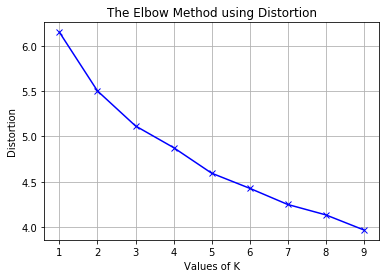

In [3]:
#Building the clustering model and calculating the values of the Distortion and Inertia
distortions = [] 

K = range(1,10) 

for k in K: 
    #Building and fitting the model - Variation of the number of clusters k (from 1 to 10)
    kmeanModel = KMeans(n_clusters=k).fit(Data_value) 
    kmeanModel.fit(Data_value)
    
    #Measure of the distortion for k clusters
    distortions.append(sum(np.min(cdist(Data_value, kmeanModel.cluster_centers_,'euclidean'),axis=1)) / Data_value.shape[0])

#Build Classic x/y Graph with x the value of k the number of clusters and y the distortion measured
fig, ax = plt.subplots()

ax.plot(K, distortions, 'bx-')
ax.set(xlabel='Values of K', ylabel='Distortion',
       title='The Elbow Method using Distortion')
ax.grid()
 
plt.show()

In [6]:
#Saving the Elbow Method for Teams's Play Types
fig.savefig("Elbow_Method_Teams_s_Play_Types.png")

### Unsupervised Classification : KMeans Model 

Each Basketball Game is special and different, each Team changes their strategy for each game, and adapt her strategy to her opponent. So why am I analyzing Play Type on many Seasons and many Years ? I'm not going into the detail which Team uses which strategy against this or this opponent, but I'm trying to find Teams Identity, if some Teams have special Play Types on many Season. And of course each game is different, but the statistics on an all Year, it kind of shows that the Teams have some Style dependent on its players.

To explain briefly what is the aim of clustering, it's about gathering elements (Teams in this case) in a multidimensional world (11 dimensions, 1 for each Play Type in this study), and create groups (clusters). If you want more details on the mathematical plan and on the formulas used to calculate the distance between elements and create the clusters I invite you to go on this site.

In [4]:
#Fit (create) your clusters and predict all years since Season 2015-2016 with kmeans model
Kmeans_7 = KMeans(n_clusters=7, init='random',n_init=10, max_iter=300,tol=1e-04, random_state=0)
Pred_All_Years = Kmeans_7.fit_predict(Data_value)

In [5]:
#Open the folder where I want to put the files of Output
os.chdir("C:/Users/julie/Documents/Projets_Perso/Sport_Analytics/Basket/NBA")

#Add Archetype model to Data and store it in an Excel File 
Data['Archetype'] = Pred_All_Years

Data.head()

,TEAM - SEASON,TRANSITION,ISOLATION,P&R_BH,P&R_RM,POST_UP,SPOT_UP,HANDOFF,CUT,OFF_SCREEN,PUTBACKS,MISC,Archetype
0,Atlanta Hawks 2015-2016,14.9,5.6,16.7,8.6,5.7,21.0,4.3,8.4,6.1,3.4,5.3,6
1,Atlanta Hawks 2016-2017,12.9,6.0,17.7,7.1,6.2,19.6,4.4,7.7,6.5,5.5,6.4,1
2,Atlanta Hawks 2017-2018,12.0,5.6,21.7,7.7,1.2,20.8,5.8,6.6,8.3,4.7,5.8,2
3,Atlanta Hawks 2018-2019,17.3,3.7,19.5,6.6,2.8,22.0,6.9,6.9,2.3,6.1,5.9,2
4,Boston Celtics 2015-2016,16.3,5.2,14.3,7.3,5.9,19.9,6.6,6.8,6.1,5.6,6.0,3


In [ ]:
#Extraction to the 7 Clusters Model to Excel File
Data.to_excel('Teams_s_Play_Types_7_Cluster.xlsx')

### Results 

#### Tableau fait sur 'Teams_s_Play_Types_7_Cluster_bis.xlsx'

The Analysis of the results, especially in the case of unsupervised algorithm problem is very subjective, so in this part I am going to develop my feeling and my viewpoint of the Result and you might have another opinion. As you so on the Data extraction we have 11 different Play Types and we have 7 Clusters so the border of the clusters might be very close some time, that is why for sometimes I will speak about 2 or 3 clusters that are very close and we will look to their specialties.


I will first speak about the three clusters of Teams that have for me the closest Play Types to 'the classic' NBA Type, or maybe more 'old school' NBA Type, because NBA Style changed, with the 3 Points Shooters but above all NBA changed because of the number of European Players in the League. Those teams build their offenses play the most with Transition, Pick & Roll (specially Pick & Roll Ball Handler) and Spot Up. The difference between those 3 Styles will come from the use of Isolation, Post up or Cut Play. 
Between the Seanson 2015-2016 and 2018-2019 the 'Old School' Teams that use more Isolation (renamed 'Old School Isolation Teams', Cluster 0) are Portland with a lot of Isolation for Damian Lillard or CJ McCollum and LA Clippers. Those Teams are also the Teams that used the most Pick & Roll Ball Handler in this period.
The Teams that use a lot Post up with the 3 principal Play Types of Old School Teams (rename 'Old School Post up', Cluster 3) are Teams with Big Guys, such as Philadelphia with Joel Embiid, Denver with Jokic (despite he plays everywhere) and Milwaukee with Brook Lopez and also the MVP 2019 Giannis Antetokounmpo.
The third and last 'Old School' group of Teams and Cluster is the group that alternates the most after the 3 principal Play Types of Old School Teams. They use Isolation, Pick & Roll Roll Man, Cut and a bit less Post up Plays. In this Cluster we can find Indiana and Oklahoma.

Being European, that's maybe the Play Type and Style that I prefer, so now I am developing 2 clusters that for me are the closest to European Teams Offensively because they use less Transitions and Fast Plays that other NBA Teams. When we discuss about European Basketball Style we have to speak about the San Antonio Spurs, so I will start this part with San Antonio's Cluster. This is probably the Offensive Style that offers the possibilities and that is the most balanced. Those Teams use a lot Catch and Shoot (Spot up) and Pick & Roll Ball Handler but other Play Type frequency is rather well balanced between 4 and 12 %. This cluster is the biggest one, maybe because of the increase of the number of European Players. There are San Antonio, Minnesota, Memphis, Dallas and New York (between 2015 and 2020).

The second European Cluster uses more Pick & Roll (Ball Handler and Roll Man). 25 % of their offensive plays are Pick & Roll. Those Teams have fast Guards and Big Men to make the screens, there are Utah, with the use of Rudy Gobert, Charlotte and Miami too.

The last two Clusters are more particular because they concern one Team each. The first one is a Team based on Fast Play and Isolation. For those you follow a bit the NBA, you would not be surprised if I tell you that this Team is neither more nor less than Houston. It is not very surprising when their coach Mike D'Antoni said that he wants the Rocket plays in '6s or less' with the arrival of Russell Westbrook. But between 2015 and 2019 the mentality was a bit the same, play fast and build the Team on James Harden offensive skills. As European basketball lover, you would understand that it is known the Game that I enjoy watching, but it is a strategy that works more or less and gave Houston some pretty results, not NBA Champion but West Conference Final in 2018 and Western Conference Semi Final in 2017 and 2019.

The last but not least Cluster, also constitute on one Team, is Golden State Warriors. With Stephen Curry, Kevin Durant and mostly Klay Thomson the Team plays a lot on Catch and Shoot (Spot Up), but it is not their first weapon, Warriors is the Team that uses the most Transition and uses the less Pick & Roll. Between 2015 and 2019 Golden State is the Team that use the most ball movement and screen without the ball, this is why we find that the Warriors is the team that use the most Cut and Off Screen Plays. I would have really enjoyed comparing it with the San Antonio Spurs between 2012 and 2015.

## Visualization of the different Game Styles

In [6]:
#Files Library
import os

#Maths and Matrix Libraries
import numpy as np 
import pandas as pd

#Datavisualization Library
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D

In [7]:
def radar_factory(num_vars, frame='circle'):
    """Create a radar chart with `num_vars` axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle' | 'polygon'}
        Shape of frame surrounding axes.

    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)

    class RadarAxes(PolarAxes):

        name = 'radar'

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            # rotate plot such that the first axis is at the top
            self.set_theta_zero_location('N')

        def fill(self, *args, closed=True, **kwargs):
            """Override fill so that line is closed by default"""
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.concatenate((x, [x[0]]))
                y = np.concatenate((y, [y[0]]))
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            # The Axes patch must be centered at (0.5, 0.5) and of radius 0.5
            # in axes coordinates.
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars,
                                      radius=.5, edgecolor="k")
            else:
                raise ValueError("unknown value for 'frame': %s" % frame)

        def draw(self, renderer):
            """ Draw. If frame is polygon, make gridlines polygon-shaped """
            if frame == 'polygon':
                gridlines = self.yaxis.get_gridlines()
                for gl in gridlines:
                    gl.get_path()._interpolation_steps = num_vars
            super().draw(renderer)


        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                # spine_type must be 'left'/'right'/'top'/'bottom'/'circle'.
                spine = Spine(axes=self,
                              spine_type='circle',
                              path=Path.unit_regular_polygon(num_vars))
                # unit_regular_polygon gives a polygon of radius 1 centered at
                # (0, 0) but we want a polygon of radius 0.5 centered at (0.5,
                # 0.5) in axes coordinates.
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                                    + self.transAxes)


                return {'polar': spine}
            else:
                raise ValueError("unknown value for 'frame': %s" % frame)

    register_projection(RadarAxes)
    return theta


In [8]:
#Open the folder where are the files
os.chdir("C:/Users/julie/Documents/Projets_Perso/Sport_Analytics/Basket/NBA")

# Read data from file 'Play_Type_7_Clusters_Analysis.xlsx' 
Data_Visualization_Type = pd.read_excel("Play_Type_7_Clusters_Analysis.xlsx")

#Select the Labels of the Archetype
labels = Data_Visualization_Type['ARCHETYPE']

#Drop first column to use only numerical features during the clustering processus (df is the matrix that we will use in the )
Data_Play_Type_ArcheTypes = Data_Visualization_Type.drop('ARCHETYPE', 1)


###  Visualization Game Identity by Archetype - All Team

To see which Play Types are the most used by each Cluster I think the best Graphic Representation is the Radar Chart. In this analysis case lots of Teams Clusters are very close and with 7 Clusters it makes the visualization of the graph less easy but still effective.

In [9]:
Data_Play_Type_ArcheTypes_Value = Data_Play_Type_ArcheTypes.values
data = [['Visualization Game Identity by Archetype - All Team', Data_Play_Type_ArcheTypes_Value.tolist()]]

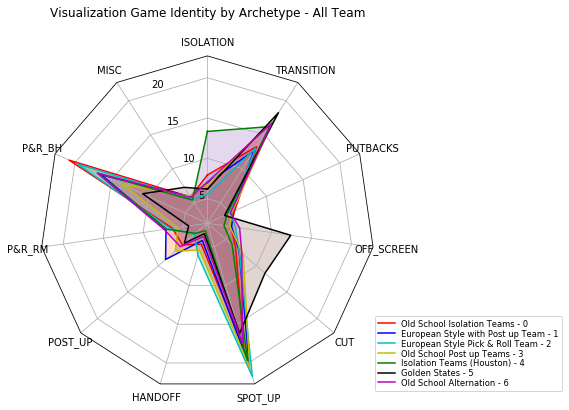

In [10]:
N = len(Data_Play_Type_ArcheTypes_Value[0])
theta = radar_factory(N, frame='polygon')

spoke_labels = Data_Play_Type_ArcheTypes.columns
title, case_data = data[0]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(projection='radar'))
fig.subplots_adjust(top=0.85, bottom=0.05)

ax.set_rgrids([5, 10, 15, 20])
ax.set_title(title,  position=(0.5, 1.1), ha='center')

colors = ['r', 'b', 'c', 'y', 'g', 'k', 'm']

for d, color in zip(case_data, colors):
    line = ax.plot(theta, d, color=color)
    ax.fill(theta, d, alpha=0.25)
ax.set_varlabels(spoke_labels)

#labels = ('Factor 1', 'Factor 2', 'Factor 3', 'Factor 4', 'Factor 5')
legend = ax.legend(labels, loc=(1, 0),
                labelspacing=0.1, fontsize='small')

plt.show()

In [15]:
#Saving 
fig.savefig("Visualization_Game_Identity_by_Archetype.png")

### Visualization Game Identity by Archetype - Old School Team

#### Pas à mettre dans l'article

In [29]:
#
Data_Play_Type_ArcheTypes_OldSchool = Data_Play_Type_ArcheTypes.drop([1,2,4,5])

Data_Play_Type_ArcheTypes_Value_OldSchool = Data_Play_Type_ArcheTypes_OldSchool.values
data_oldschool = [['Visualization Game Identity by Archetype - Old School', Data_Play_Type_ArcheTypes_Value_OldSchool.tolist()]]

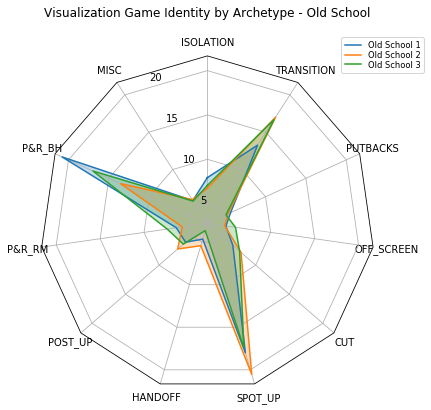

In [35]:
N = len(Data_Play_Type_ArcheTypes_Value_OldSchool[0])
theta_o = radar_factory(N, frame='polygon')

spoke_labels = Data_Play_Type_ArcheTypes_OldSchool.columns
title, case_data = data_oldschool[0]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(projection='radar'))
fig.subplots_adjust(top=0.85, bottom=0.05)

ax.set_rgrids([5, 10, 15, 20])
ax.set_title(title,  position=(0.5, 1.1), ha='center')

for d in case_data:
    line = ax.plot(theta_o, d)
    ax.fill(theta_o, d,  alpha=0.25)
ax.set_varlabels(spoke_labels)

labels_oldschool = ('Old School 1', 'Old School 2', 'Old School 3')
legend = ax.legend(labels_oldschool, loc=(1, 0),
                labelspacing=0.1, fontsize='small')

plt.show()

### Visualization Game Identity by Archetype - European Team

In [33]:
#
Data_Play_Type_ArcheTypes_European = Data_Play_Type_ArcheTypes.drop([0,3,4,5,6])

Data_Play_Type_ArcheTypes_Value_European = Data_Play_Type_ArcheTypes_European.values
data_european = [['Visualization Game Identity by Archetype - European ', Data_Play_Type_ArcheTypes_Value_European.tolist()]]

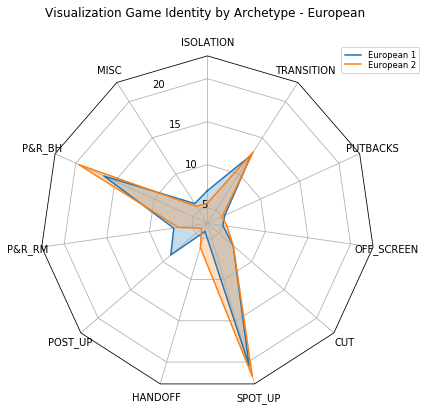

In [34]:
N = len(Data_Play_Type_ArcheTypes_Value_European[0])
theta_e = radar_factory(N, frame='polygon')

spoke_labels = Data_Play_Type_ArcheTypes_European.columns
title, case_data = data_european[0]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(projection='radar'))
fig.subplots_adjust(top=0.85, bottom=0.05)

ax.set_rgrids([5, 10, 15, 20])
ax.set_title(title,  position=(0.5, 1.1), ha='center')

for d in case_data:
    line = ax.plot(theta_e, d)
    ax.fill(theta_e, d,  alpha=0.25)
ax.set_varlabels(spoke_labels)

labels_european = ('European 1', 'European 2')
legend = ax.legend(labels_european, loc=(1, 0),
                labelspacing=0.1, fontsize='small')

plt.show()

## Classification for 2019

Now in this part we will use the model and the clusters that we build previosly to see in wich 'Game Style' and category belong each Team on this Season (2019-2020).The half of the games has been played so this is relevant to try and make this classification.

In [5]:
#Open the folder where are the files
os.chdir("C:/Users/julie/Documents/Projets_Perso/Sport_Analytics/Basket/NBA/Databases")

# Read data from file 'Teams_Play_Types_Synthesis.xlsx' 
Data_2019 = pd.read_excel("Teams_Play_Types_Synthesis_2019_2020.xlsx")

#Drop first column to use only numerical features during the clustering processus (df is the matrix that we will use in the )
Data_Play_2019 = Data_2019.drop('TEAM - SEASON', 1)

In [6]:
#Make prediction for Season 2019-2020 with the model created abrove
Pred_2019 = Kmeans_7.predict(Data_Play_2019)

Data_2019['Archetype'] = Pred_2019

In [8]:
os.chdir("C:/Users/julie/Documents/Projets_Perso/Sport_Analytics/Basket/NBA")
Data_2019.to_excel('Teams_s_Play_Types_2019_Pred.xlsx')

## How NBA Teams can use those Type of Data 